In [1]:
import matplotlib.pyplot as plt 
from nilearn import plotting
import numpy as np
import pandas as pd

(652, 20484)


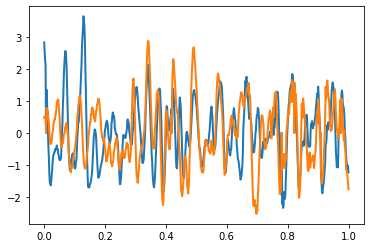

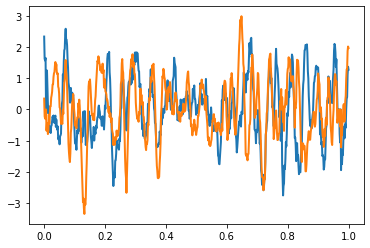

In [3]:
from brainspace.datasets import fetch_timeseries_preprocessing
timeseries = fetch_timeseries_preprocessing()
print(timeseries.T.shape)

from brainspace.datasets import load_confounds_preprocessing
confounds_out = load_confounds_preprocessing()

from nilearn import signal
clean_ts = signal.clean(timeseries.T, confounds=confounds_out).T

x = np.linspace(0, 1, 652)
#print(x)
y = clean_ts[1]
y2 = clean_ts[2]
y3 = clean_ts[2000]
y4 = clean_ts[10000]
#print(y)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
ax.plot(x, y2, linewidth=2.0)

fig2, ax2 = plt.subplots()
ax2.plot(x, y3, linewidth=2.0)
ax2.plot(x, y4, linewidth=2.0)


In [4]:
r1 = np.corrcoef(y,y2)
r2 = np.corrcoef(y3,y4)
print(r1)
print(r2)

[[1.         0.38928603]
 [0.38928603 1.        ]]
[[1.         0.30940391]
 [0.30940391 1.        ]]


In [6]:
import numpy as np
from nilearn import datasets
from brainspace.utils.parcellation import reduce_by_labels

# Fetch surface atlas
atlas = datasets.fetch_atlas_surf_destrieux()

# Remove non-cortex regions
regions = atlas['labels'].copy()
masked_regions = [b'Medial_wall', b'Unknown']
masked_labels = [regions.index(r) for r in masked_regions]
for r in masked_regions:
    regions.remove(r)

# Build Destrieux parcellation and mask
labeling = np.concatenate([atlas['map_left'], atlas['map_right']])
mask = ~np.isin(labeling, masked_labels)

# Distinct labels for left and right hemispheres
lab_lh = atlas['map_left']
labeling[lab_lh.size:] += lab_lh.max() + 1

# extract mean timeseries for each label
seed_ts = reduce_by_labels(clean_ts[mask], labeling[mask], axis=1, red_op='mean')

 ...done. (3 seconds, 0 min)


Downloaded 8192 of 85260 bytes (9.6%,    9.4s remaining) ...done. (3 seconds, 0 min)


In [7]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([seed_ts.T])[0]

In [11]:
print(correlation_measure)
print(correlation_matrix.shape)


ConnectivityMeasure(kind='correlation')
(148, 148)


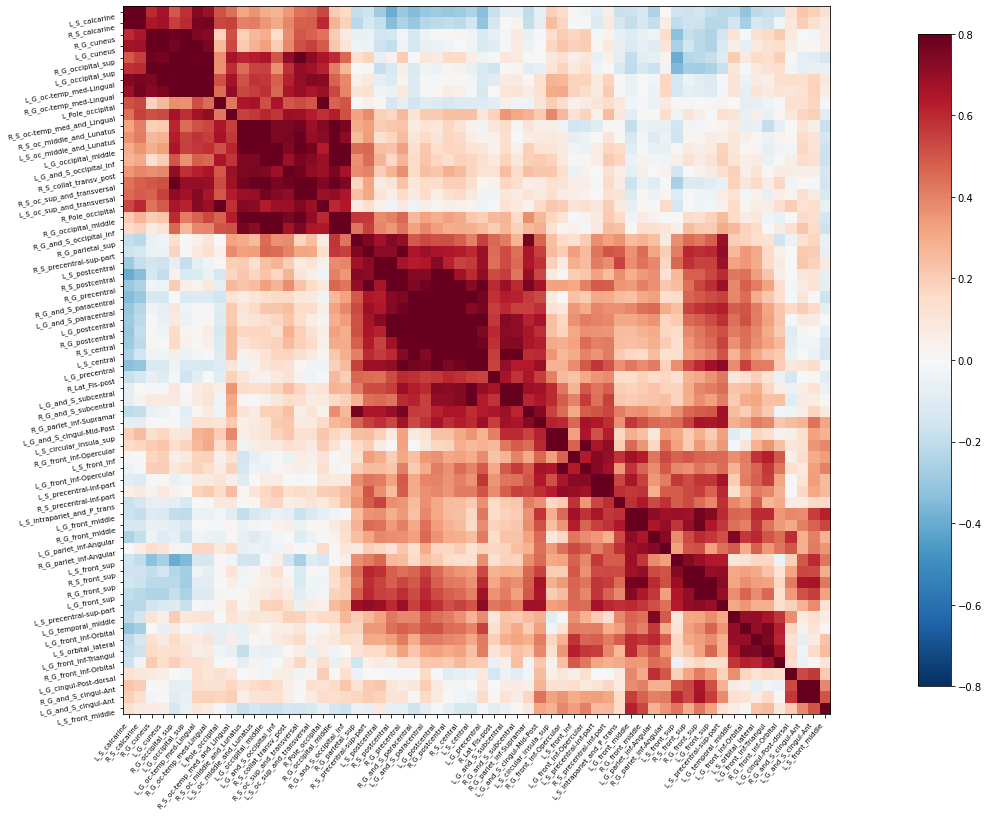

In [12]:
from nilearn import plotting

# Reduce matrix size, only for visualization purposes
mat_mask = np.where(np.std(correlation_matrix, axis=1) > 0.2)[0]
c = correlation_matrix[mat_mask][:, mat_mask]

# Create corresponding region names
regions_list = ['%s_%s' % (h, r.decode()) for h in ['L', 'R'] for r in regions]
masked_regions = [regions_list[i] for i in mat_mask]


corr_plot = plotting.plot_matrix(c, figure=(15, 15), labels=masked_regions,
                                 vmax=0.8, vmin=-0.8, reorder=True)

In [34]:
print(clean_ts[0:10])

a = clean_ts[np.ix_([0,10],[0,10])]
print(a.shape)
print(clean_ts.shape)

#corr_plot = plotting.plot_matrix(clean_ts, figure=(1,25), labels=False, vmax=3, vmin=-3)

SyntaxError: invalid syntax (1154293590.py, line 2)